<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [54]:
#TODO add early stopping, dropout, regularization

#Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
#Use Cross Validation techniques to get more consistent results with your model.
#Use GridSearchCV to try different combinations of hyperparameters.
#Start looking into other types of Keras layers for CNNs and RNNs maybe
#try and build a CNN model for fashion-MNIST to see how the results compar

#feature engineering - remove outliers, etc. run pandas profiling


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Flatten

#https://www.tensorflow.org/tutorials/keras/save_and_load


In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [6]:
train_data.shape

(404, 13)

In [8]:
train_data[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [10]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [17]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

In [18]:
model.compile(loss='mse', optimizer='adam')

In [20]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

results = model.fit(x = train_data,
         y = train_targets,
         epochs = 15,
         validation_data=(test_data, test_targets),
         callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Train on 404 samples, validate on 102 samples
Epoch 1/15
404/404 [==============================] - 0s 261us/sample - loss: 43.7268 - val_loss: 40.8057
Epoch 2/15
404/404 [==============================] - 0s 442us/sample - loss: 38.5713 - val_loss: 35.9014
Epoch 3/15
404/404 [==============================] - 0s 75us/sample - loss: 34.4389 - val_loss: 32.4606
Epoch 4/15
404/404 [==============================] - 0s 96us/sample - loss: 31.3055 - val_loss: 29.7386
Epoch 5/15
404/404 [==============================] - 0s 86us/sample - loss: 29.1025 - val_loss: 27.9347
Epoch 6/15
404/404 [==============================] - 0s 104us/sample - loss: 27.1864 - val_loss: 26.3800
Epoch 7/15
404/404 [==============================] - 0s 84us/sample - loss: 25.8099 - val_loss: 24.9541
Epoch 8/15
404/404 [==============================] - 0s 116us/sample - loss: 24.6911 - val_loss: 23.9697
Epoch 9/15
404/404 [

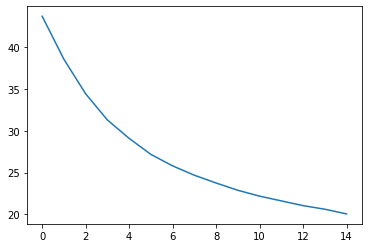

In [28]:
import seaborn as sns
results.history.keys()
sns.lineplot(x=[i for i in range(15)], y=results.history['loss'])
import matplotlib.pyplot as plt
plt.show()

Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
After feature engineering, which model sees a greater accuracy boost due to the new features?

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression().fit(train_data, train_targets)

In [31]:
regression.score(test_data, test_targets)

0.7213535934621551

In [32]:
test_pred = regression.predict(test_data)

In [34]:
test_pred.shape == test_targets.shape

True

In [37]:
mse = ((test_pred - test_targets)**2).mean()

In [38]:
print("the mean squared error:", mse)

the mean squared error: 23.19559925642299


In [40]:
import pandas as pd
pd.DataFrame(train_data).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.192179,0.397419,-0.050828,0.405765,-0.217597,0.344410,-0.378590,0.609689,0.575652,0.273447,-0.390613,0.434384
1,-0.192179,1.000000,-0.533823,-0.041981,-0.521713,0.338683,-0.578728,0.650787,-0.311091,-0.303522,-0.403139,0.176006,-0.415237
2,0.397419,-0.533823,1.000000,0.052839,0.774200,-0.409924,0.656350,-0.725155,0.599226,0.701362,0.379284,-0.372885,0.603129
3,-0.050828,-0.041981,0.052839,1.000000,0.079803,0.040431,0.080488,-0.083101,-0.024851,-0.051343,-0.122008,0.037832,-0.011017
4,0.405765,-0.521713,0.774200,0.079803,1.000000,-0.335866,0.729338,-0.777062,0.616535,0.673471,0.188160,-0.409479,0.592994
5,-0.217597,0.338683,-0.409924,0.040431,-0.335866,1.000000,-0.240875,0.233970,-0.243990,-0.307904,-0.367256,0.145525,-0.610844
6,0.344410,-0.578728,0.656350,0.080488,0.729338,-0.240875,1.000000,-0.766670,0.462188,0.512746,0.282193,-0.278403,0.590898
7,-0.378590,0.650787,-0.725155,-0.083101,-0.777062,0.233970,-0.766670,1.000000,-0.511179,-0.543668,-0.243067,0.295995,-0.507075
8,0.609689,-0.311091,0.599226,-0.024851,0.616535,-0.243990,0.462188,-0.511179,1.000000,0.922676,0.449908,-0.478245,0.490250
9,0.575652,-0.303522,0.701362,-0.051343,0.673471,-0.307904,0.512746,-0.543668,0.922676,1.000000,0.440499,-0.471777,0.534752


### Assessing accuracy:

The neural network begins with lower accuracy, but reaches superior performance around the 10th epoch and goes on to exceed linear regression accuracy.

In [72]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [73]:
x_train.shape

(60000, 28, 28)

In [74]:
y_train.shape

(60000,)

In [75]:
x_test.shape

(10000, 28, 28)

In [76]:
x_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [77]:
x_train = x_train/255
x_test = x_test/255

In [78]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
#y_train = y_train.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
#encoder.fit(y_train)
#y_train = encoder.transform(y_train)
#y_test = encoder.transform(y_test)


In [87]:
y_test
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [88]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten(),
    Dense(30, activation = 'relu', input_dim=784),
    Dense(15, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
         
results = model.fit(x_train, y_train, 
                    verbose = 1, 
                    epochs = 50,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5785 - accuracy: 0.7954 - val_loss: 0.4838 - val_accuracy: 0.8335
Epoch 2/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4149 - accuracy: 0.8502 - val_loss: 0.4386 - val_accuracy: 0.8389
Epoch 3/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3789 - accuracy: 0.8626 - val_loss: 0.4016 - val_accuracy: 0.8562
Epoch 4/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3588 - accuracy: 0.8688 - val_loss: 0.4213 - val_accuracy: 0.8500
Epoch 5/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3408 - accuracy: 0.8758 - val_loss: 0.4184 - val_accuracy: 0.8459
Epoch 6/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3299 - accuracy: 0.8787 - val_lo

In [89]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

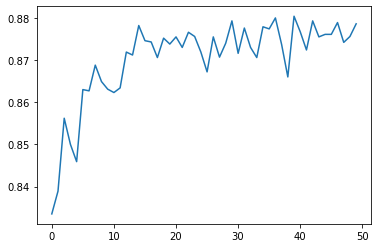

In [90]:
import seaborn as sns
sns.lineplot(x=[i for i in range(len(results.history["val_accuracy"]))], y=results.history['val_accuracy'])
plt.show()

In [95]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


stop = EarlyStopping(monitor='val_accuracy', 
                              min_delta=.01, 
                              patience=10)
model = Sequential([
    Flatten(),
    Dense(30, activation = 'relu', input_dim=784),
    Dropout(.2),
    Dense(15, activation = 'relu'),
    Dropout(.1),
    Dense(30, activation = 'relu'),
    Dropout(.1),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
         
results = model.fit(x_train, y_train, 
                    verbose = 1, 
                    epochs = 50,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback, stop])



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.8078 - accuracy: 0.7097 - val_loss: 0.4875 - val_accuracy: 0.8272
Epoch 2/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5589 - accuracy: 0.8031 - val_loss: 0.4408 - val_accuracy: 0.8464
Epoch 3/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5140 - accuracy: 0.8198 - val_loss: 0.4424 - val_accuracy: 0.8418
Epoch 4/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4891 - accuracy: 0.8278 - val_loss: 0.4214 - val_accuracy: 0.8532
Epoch 5/50
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4713 - accuracy: 0.8342 - val_loss: 0.4021 - val_accuracy: 0.8573
Epoch 6/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4619 - accuracy: 0.8368 - val_l

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.